In [1]:
import pandas as pd
import altair as alt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
movies_df = pd.read_csv('TG Entertainment List - Movie Page.csv', parse_dates=['Date'])

In [3]:
movies_df.columns

Index(['Director+Movie', 'Director + Time', 'Movie', 'Year', 'Genre1',
       'Genre2', 'Language', 'Director', 'Studio', 'Year Seen', 'Runtime ',
       'Rating ', 'Date', 'Theatre'],
      dtype='object')

In [4]:
movies_df.drop(columns=['Director+Movie', 'Director + Time'], inplace=True)

In [5]:
movies_df.columns = movies_df.columns.str.strip()

In [6]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 346 entries, 0 to 345
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Movie      346 non-null    object        
 1   Year       346 non-null    int64         
 2   Genre1     346 non-null    object        
 3   Genre2     252 non-null    object        
 4   Language   346 non-null    object        
 5   Director   346 non-null    object        
 6   Studio     346 non-null    object        
 7   Year Seen  346 non-null    int64         
 8   Runtime    346 non-null    int64         
 9   Rating     346 non-null    int64         
 10  Date       117 non-null    datetime64[ns]
 11  Theatre    346 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(6)
memory usage: 32.6+ KB


movies_df['Date'] = pd.to_datetime(movies_df['Date']).dt.date

In [7]:
weekend = ['Friday', 'Saturday','Sunday']

In [8]:
movies_df['Genre'] = movies_df['Genre1'].astype(str) +', ' + movies_df['Genre2'].astype(str)

In [9]:
movies_df['Target'] = np.where(movies_df['Rating'] >= 7, 1, 0)

In [10]:
movies_df['Weekday'] = movies_df['Date'].dt.dayofweek
movies_df['Month'] = movies_df['Date'].dt.month
movies_df['Quarter'] = movies_df['Date'].dt.quarter
movies_df['Day of Week'] = movies_df['Date'].dt.day_name()

In [11]:
movies_df['is_weekend'] = np.where(movies_df['Day of Week'].isin(weekend), 1, 0)

In [12]:
df19 = movies_df.loc[movies_df['Date'] >= '1-01-2019']

In [13]:
df19

,Movie,Year,Genre1,Genre2,Language,Director,Studio,Year Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
229,Big Hero 6,2014,Sci-fi,Action,English,"Don Hall, Chris Williams",Disney,2019,102,8,2019-01-01,0,"Sci-fi, Action",1,1.0,1.0,1.0,Tuesday,0
230,From Dusk Til Dawn,1996,Action,Horror,English,Robert Rodriguez,Dimension Films,2019,108,5,2019-01-10,0,"Action, Horror",0,3.0,1.0,1.0,Thursday,0
231,Silver Linings Playbook,2012,Drama,Comedy,English,David O. Russell,The Weinstein Company,2019,122,8,2019-01-11,0,"Drama, Comedy",1,4.0,1.0,1.0,Friday,1
232,Solo: A Star Wars Story,2018,Action,Adventure,English,Ron Howard,Lucasfilm,2019,135,5,2019-01-14,0,"Action, Adventure",0,0.0,1.0,1.0,Monday,0
233,The Little Hours,2017,Comedy,Romance,English,Jeff Baena,Destro Films,2019,90,6,2019-01-17,0,"Comedy, Romance",0,3.0,1.0,1.0,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341,Frances Ha,2012,Drama,Romance,English,Noah Baumbach,Pine District Pictures,2019,86,7,2019-12-10,0,"Drama, Romance",1,1.0,12.0,4.0,Tuesday,0
342,Klaus,2019,Adventure,Comedy,English,Sergio Pablos,The SPA Studios,2019,96,8,2019-12-14,0,"Adventure, Comedy",1,5.0,12.0,4.0,Saturday,1
343,Get Smart,2008,Action,Comedy,English,Peter Segal,WB,2019,110,6,2019-12-22,0,"Action, Comedy",0,6.0,12.0,4.0,Sunday,1
344,Star Wars: The Rise of Skywalker,2019,Action,Adventure,English,J.J. Abrams,Disney,2019,142,3,2019-12-26,1,"Action, Adventure",0,3.0,12.0,4.0,Thursday,0


In [14]:
df19['Runtime'].sum() 

13442

In [15]:
df19['Runtime'].min(), df19['Runtime'].max() 

(55, 207)

In [16]:
shtvlong = df19.loc[(df19['Runtime'] == df19['Runtime'].min()) | (df19['Runtime'] == df19['Runtime'].max())]

In [17]:
shtvlong

,Movie,Year,Genre1,Genre2,Language,Director,Studio,Year Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
250,Seven Samurai,1954,Drama,Action,Japanese,Akira Kurosawa,Toho,2019,207,9,2019-03-13,0,"Drama , Action",1,2.0,3.0,1.0,Wednesday,0
260,Guava Island,2019,Thriller,NaN,English,Hiro Murai,Amazon Studios,2019,55,1,2019-04-29,0,"Thriller, nan",0,0.0,4.0,2.0,Monday,0


In [18]:
bstvwrst = df19.loc[(df19['Rating'] == df19['Rating'].min()) | (df19['Rating'] == df19['Rating'].max())]

In [19]:
bstvwrst

,Movie,Year,Genre1,Genre2,Language,Director,Studio,Year Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
249,Roma,2018,Drama,NaN,Spanish,Alfonso Cuarón,Netflix,2019,135,10,2019-03-10,0,"Drama, nan",1,6.0,3.0,1.0,Sunday,1
254,A Man Called Ove,2015,Comedy,Drama,Swedish,Hannes Holm,Tre Vänner Produktion AB,2019,116,10,2019-04-13,0,"Comedy, Drama",1,5.0,4.0,2.0,Saturday,1
260,Guava Island,2019,Thriller,NaN,English,Hiro Murai,Amazon Studios,2019,55,1,2019-04-29,0,"Thriller, nan",0,0.0,4.0,2.0,Monday,0
330,Spirited Away,2001,Adventure,Family,English,Hayao Miyazaki,Studio Ghibili,2019,125,10,2019-10-30,1,"Adventure, Family",1,2.0,10.0,4.0,Wednesday,0
333,Princess Mononoke,1997,Adventure,Fantasy,English,Hayao Miyazaki,Studio Ghibili,2019,134,10,2019-11-20,1,"Adventure, Fantasy",1,2.0,11.0,4.0,Wednesday,0
336,Parasite,2019,Drama,Thriller,Korean,Bong Joon-ho,Barunson E&A,2019,132,10,2019-12-02,1,"Drama, Thriller",1,0.0,12.0,4.0,Monday,0
339,Marriage Story,2019,Drama,Romance,English,Noah Baumbach,Netflix,2019,136,10,2019-12-08,0,"Drama, Romance",1,6.0,12.0,4.0,Sunday,1


In [20]:
weekday_list=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

In [21]:
plt.style.use('fivethirtyeight')

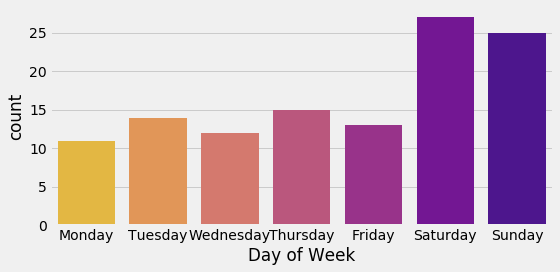

In [22]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(df19['Day of Week'], order=weekday_list, palette='plasma_r')
fig.tight_layout()

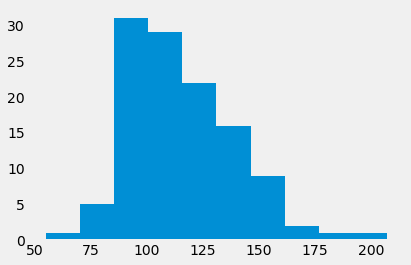

In [23]:
df19['Runtime'].hist(grid=False)

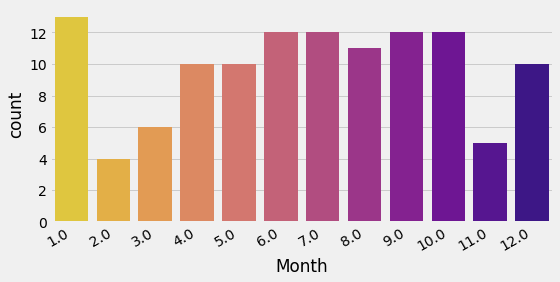

In [24]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(df19['Month'], palette='plasma_r')
fig.tight_layout()
fig.autofmt_xdate()

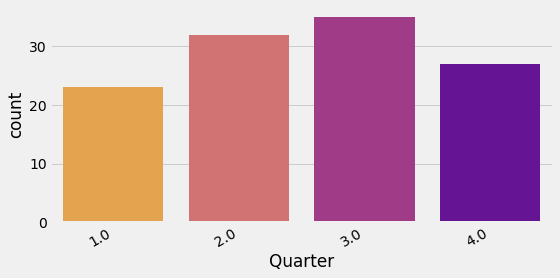

In [25]:
fig = plt.figure(figsize=(8,4))
ax = sns.countplot(df19['Quarter'], palette='plasma_r')
fig.tight_layout()
fig.autofmt_xdate()

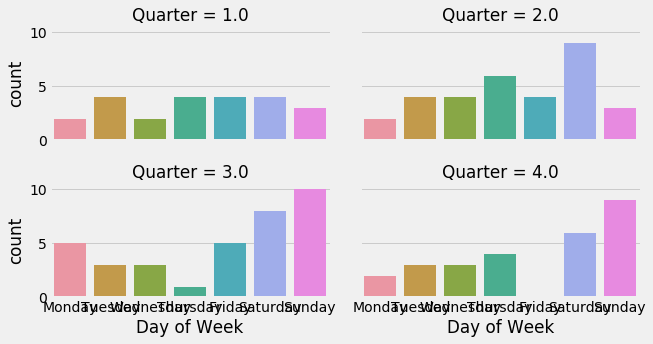

In [26]:
g = sns.catplot(col="Quarter", x='Day of Week', col_wrap=2, order=weekday_list,
                 data=df19, kind="count", height=2.5, aspect=1.8)

In [27]:
df19i = df19.set_index('Date')

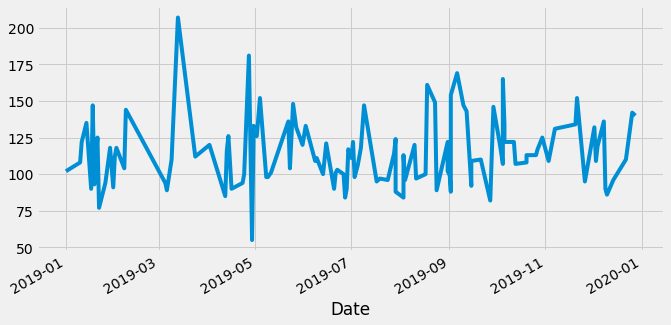

In [28]:
fig = plt.figure(figsize=(10,5))
ax = df19i['Runtime'].plot()
#myFmt = mdates.DateFormatter('%D')
#ax.xaxis.set_major_formatter(myFmt)
#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
fig.autofmt_xdate()

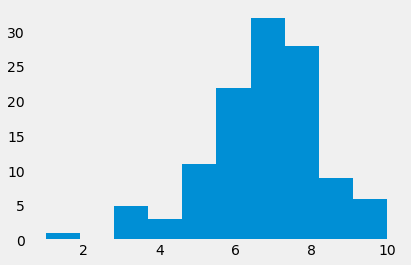

In [29]:
df19['Rating'].hist(grid=False)

In [30]:
df19t = df19.loc[df19['Theatre'] == 1]

In [31]:
print('How many films did I see in theatres: ' + str(df19t.shape[0]) + '\n Not in theatres: ' + str(df19.shape[0]-df19t.shape[0])) 

How many films did I see in theatres: 13
 Not in theatres: 104


In [32]:
df19ti = df19t.set_index('Date')

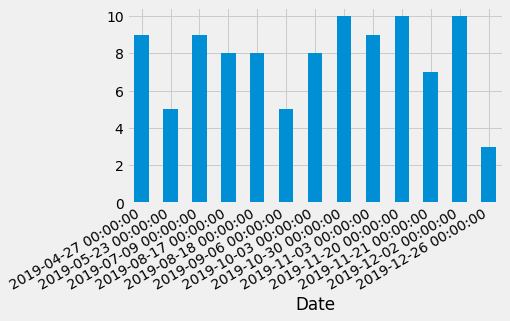

In [33]:
fig = plt.figure(figsize=(6,4))
df19ti['Rating'].plot(kind='bar')
fig.autofmt_xdate()

In [34]:
df19ti[['Movie', 'Director', 'Rating']]

,Movie,Director,Rating
Date,,,
2019-04-27,Avengers: Endgame,"Anthony Russo, Joseph Russo",9
2019-05-23,Detective Pikachu,Rob Letterman,5
2019-07-09,Midsommar,Ari Aster,9
2019-08-17,The Farewell,Lulu Wang,8
2019-08-18,Once Open A Time in Hollywood,Quentin Taratino,8
2019-09-06,IT Chapter 2,Andy Muschietti,5
2019-10-03,Joker,Todd Phillips,8
2019-10-30,Spirited Away,Hayao Miyazaki,10
2019-11-03,The Lighthouse,Robert Eggers,9


In [35]:
df19.isna().sum()

Movie           0
Year            0
Genre1          0
Genre2         14
Language        0
Director        0
Studio          0
Year Seen       0
Runtime         0
Rating          0
Date            0
Theatre         0
Genre           0
Target          0
Weekday         0
Month           0
Quarter         0
Day of Week     0
is_weekend      0
dtype: int64

In [36]:
df19.columns

Index(['Movie', 'Year', 'Genre1', 'Genre2', 'Language', 'Director', 'Studio',
       'Year Seen', 'Runtime', 'Rating', 'Date', 'Theatre', 'Genre', 'Target',
       'Weekday', 'Month', 'Quarter', 'Day of Week', 'is_weekend'],
      dtype='object')

In [37]:
df19.head()

,Movie,Year,Genre1,Genre2,Language,Director,Studio,Year Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
229,Big Hero 6,2014,Sci-fi,Action,English,"Don Hall, Chris Williams",Disney,2019,102,8,2019-01-01,0,"Sci-fi, Action",1,1.0,1.0,1.0,Tuesday,0
230,From Dusk Til Dawn,1996,Action,Horror,English,Robert Rodriguez,Dimension Films,2019,108,5,2019-01-10,0,"Action, Horror",0,3.0,1.0,1.0,Thursday,0
231,Silver Linings Playbook,2012,Drama,Comedy,English,David O. Russell,The Weinstein Company,2019,122,8,2019-01-11,0,"Drama, Comedy",1,4.0,1.0,1.0,Friday,1
232,Solo: A Star Wars Story,2018,Action,Adventure,English,Ron Howard,Lucasfilm,2019,135,5,2019-01-14,0,"Action, Adventure",0,0.0,1.0,1.0,Monday,0
233,The Little Hours,2017,Comedy,Romance,English,Jeff Baena,Destro Films,2019,90,6,2019-01-17,0,"Comedy, Romance",0,3.0,1.0,1.0,Thursday,0


In [38]:
df19[df19['Day of Week'].isin(weekend)]

,Movie,Year,Genre1,Genre2,Language,Director,Studio,Year Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
231,Silver Linings Playbook,2012,Drama,Comedy,English,David O. Russell,The Weinstein Company,2019,122,8,2019-01-11,0,"Drama, Comedy",1,4.0,1.0,1.0,Friday,1
234,Apocalypse Now,1979,Drama,War,English,Francis Ford Coppola,Zoetrope Studios,2019,147,9,2019-01-18,0,"Drama, War",1,4.0,1.0,1.0,Friday,1
235,Eighth Grade,2018,Comedy,Drama,English,Bo Burnham,A24,2019,93,6,2019-01-19,0,"Comedy, Drama",0,5.0,1.0,1.0,Saturday,1
236,First Reformed,2018,Drama,Thriller,English,Paul Schrader,Killer Films,2019,113,8,2019-01-20,0,"Drama, Thriller",1,6.0,1.0,1.0,Sunday,1
239,Loving Vincent,2017,Biographical,Crime,English,"Dorota Kobiela, Hugh Welchman",BreakThru Productions,2019,94,6,2019-01-26,0,"Biographical, Crime",0,5.0,1.0,1.0,Saturday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,The Lighthouse,2019,Drama,Thriller,English,Robert Eggers,A24,2019,109,9,2019-11-03,1,"Drama, Thriller",1,6.0,11.0,4.0,Sunday,1
339,Marriage Story,2019,Drama,Romance,English,Noah Baumbach,Netflix,2019,136,10,2019-12-08,0,"Drama, Romance",1,6.0,12.0,4.0,Sunday,1
342,Klaus,2019,Adventure,Comedy,English,Sergio Pablos,The SPA Studios,2019,96,8,2019-12-14,0,"Adventure, Comedy",1,5.0,12.0,4.0,Saturday,1
343,Get Smart,2008,Action,Comedy,English,Peter Segal,WB,2019,110,6,2019-12-22,0,"Action, Comedy",0,6.0,12.0,4.0,Sunday,1


In [39]:
df19.rename(columns={'Year':'Year_Made', 'Year Seen':'Year_Seen'},inplace=True)

c:\users\tgord\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [40]:
alt.Chart(movies_df).mark_bar().encode(
    alt.Y('Year Seen:N'),
    alt.X('average(Runtime)', title='Average Movie Length'))

alt.Chart(...)

In [41]:
df19[df19['Movie'].str.contains('Princess')]

,Movie,Year_Made,Genre1,Genre2,Language,Director,Studio,Year_Seen,Runtime,Rating,Date,Theatre,Genre,Target,Weekday,Month,Quarter,Day of Week,is_weekend
300,The Princess and the Frog,2009,Adventure,Comedy,English,"Ron Clements, John Musker",Disney,2019,97,7,2019-08-11,0,"Adventure, Comedy",1,6.0,8.0,3.0,Sunday,1
333,Princess Mononoke,1997,Adventure,Fantasy,English,Hayao Miyazaki,Studio Ghibili,2019,134,10,2019-11-20,1,"Adventure, Fantasy",1,2.0,11.0,4.0,Wednesday,0


In [42]:
alt.Chart(movies_df).mark_point(filled=True).encode(
    alt.X('Date:T', title='Date'),
    alt.Y('Runtime:Q', title='Movie Length'),
    alt.Size('Rating'),
    alt.Color('Language'),
    alt.OpacityValue(0.6),
    tooltip = [alt.Tooltip('Movie'),
              alt.Tooltip('Year'),
              alt.Tooltip('Director'),
              alt.Tooltip('Runtime'),
              alt.Tooltip('Rating'),
              alt.Tooltip('Date')]
).interactive()

alt.Chart(...)

In [43]:
chart = alt.Chart(movies_df).mark_bar(color='dodgerblue').encode(
    alt.Y('Year Seen:N'),
    alt.X('sum(Runtime)', title='Runtime by Year'))

chart

alt.Chart(...)

In [44]:
y = df19['Target']

movies_df.rename(columns={'Year':'Year_Made', 'Year Seen':'Year_Seen'},inplace=True)

In [45]:
X = df19[['Year_Made', 'Language','Year_Seen', 'Runtime', 'Theatre', 'Month', 'Quarter', 'Day of Week', 'Weekday', 'Genre', 'is_weekend']]

In [46]:
X1 = X[['Year_Made', 'Runtime', 'Theatre', 'Month','Weekday', 'is_weekend']]

asdasds

In [47]:
movies_df.isna().sum()

Movie            0
Year             0
Genre1           0
Genre2          94
Language         0
Director         0
Studio           0
Year Seen        0
Runtime          0
Rating           0
Date           229
Theatre          0
Genre            0
Target           0
Weekday        229
Month          229
Quarter        229
Day of Week    229
is_weekend       0
dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.33, random_state=42)

In [51]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.linear_model import LogisticRegression

In [53]:
X_train, y_train

(     Year_Made  Runtime  Theatre  Month  Weekday  is_weekend
 296       2006       84        0    8.0      5.0           1
 257       2013       94        0    4.0      1.0           0
 274       2018      111        0    6.0      6.0           1
 312       2018      147        0    9.0      1.0           0
 234       1979      147        0    1.0      4.0           1
 ..         ...      ...      ...    ...      ...         ...
 335       2012       95        0   11.0      1.0           0
 243       2019      118        0    2.0      5.0           1
 321       1968      165        0   10.0      5.0           1
 280       2011      100        0    6.0      2.0           0
 331       2019      109        1   11.0      6.0           1
 
 [78 rows x 6 columns], 296    0
 257    0
 274    0
 312    1
 234    1
       ..
 335    1
 243    0
 321    1
 280    0
 331    1
 Name: Target, Length: 78, dtype: int32)

In [54]:
clf = LogisticRegression(random_state=42).fit(X_train, y_train)

c:\users\tgord\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [55]:
clf

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=42, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
y_pred = clf.predict(X_test)

In [57]:
y_pred_probs = clf.predict_proba(X_test)[:,1]

In [58]:
y_pred_probs

array([0.57747536, 0.30063834, 0.46964749, 0.57753784, 0.35536659,
       0.62124714, 0.59745341, 0.75754626, 0.45974854, 0.38191515,
       0.71395721, 0.61949417, 0.74214773, 0.76592825, 0.33329731,
       0.31552419, 0.5333416 , 0.57792417, 0.69962949, 0.70802991,
       0.65642995, 0.81759841, 0.81882741, 0.31746816, 0.39451641,
       0.6196496 , 0.20412366, 0.39119482, 0.586242  , 0.52215962,
       0.57715923, 0.57953561, 0.4851508 , 0.80276558, 0.83382513,
       0.63098808, 0.225481  , 0.58347502, 0.83882642])

In [59]:
testdf=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred, 'Probability':y_pred_probs})
testdf.head(15)

,Actual,Predicted,Probability
273,1,1,0.577475
233,0,0,0.300638
282,1,0,0.469647
271,0,1,0.577538
239,0,0,0.355367
314,0,1,0.621247
301,1,1,0.597453
323,1,1,0.757546
265,1,0,0.459749
240,1,0,0.381915


In [61]:
score = metrics.accuracy_score(y_test, y_pred)

In [67]:
score

0.6410256410256411

In [62]:
cm = metrics.confusion_matrix(y_test, y_pred)

In [63]:
cm

array([[ 5,  6],
       [ 8, 20]], dtype=int64)

Text(18.82, 0.5, 'Predicted')

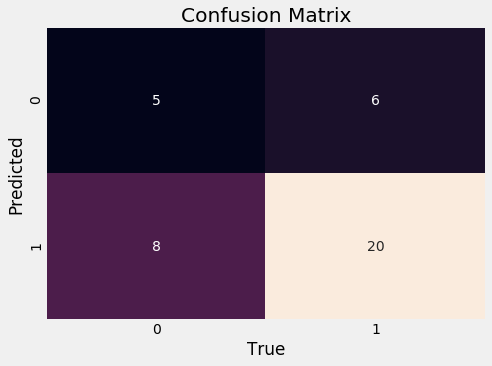

In [112]:
ax = plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('True')
plt.ylabel('Predicted')

In [64]:
report = metrics.classification_report(y_test, y_pred)

In [65]:
print(report)

              precision    recall  f1-score   support

           0       0.38      0.45      0.42        11
           1       0.77      0.71      0.74        28

   micro avg       0.64      0.64      0.64        39
   macro avg       0.58      0.58      0.58        39
weighted avg       0.66      0.64      0.65        39



In [76]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
auc_score = metrics.auc(fpr, tpr)

In [72]:
tpr

array([0.        , 0.71428571, 1.        ])

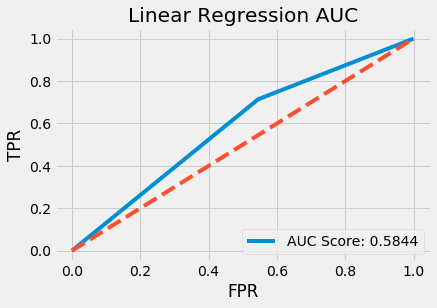

In [111]:
plt.plot(fpr, tpr, label=f'AUC Score: {auc_score:.4f}')
plt.plot([0,1], linestyle='--')
plt.title('Logistic Regression AUC')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc=4)